<a href="https://colab.research.google.com/github/duongtrung/Pytorch-tutorials/blob/main/16_smart-meter-london/Exp-visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

Datasets: https://www.kaggle.com/datasets/jeanmidev/smart-meters-in-london

Original: https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households

In [1]:
# For interactive plot, you need those libraries
# conda install -c anaconda ipywidgets
# conda install -c conda-forge ipympl 

In [2]:
# activate interactive mode
#! jupyter nbextension enable --py --sys-prefix widgetsnbextension
#! jupyter nbextension install --py --symlink --sys-prefix ipympl
#! jupyter nbextension enable ipympl --py --sys-prefix

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime

from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline
#%matplotlib widget
    
#plt.style.use("ggplot")
plt.rcParams["figure.autolayout"] = True
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
import warnings
warnings.filterwarnings("ignore")

LEVEL = "daily" # daily, halfhourly

if LEVEL == "daily":
    RAWDATA = "daily_dataset/"
    EXPDATA = "daily_exp/"
    EXPFILE = "energy_daily.csv"
    savefig = "energy_daily.png"
elif LEVEL == "halfhourly":
    RAWDATA = "halfhourly_dataset/"
    EXPDATA = "halfhourly_exp/"
    EXPFILE = "energy_halfhourly.csv"
    savefig = "energy_halfhourly.png"

### Data Combination

In [8]:
# this codes only run once
# Combining all blocks

#for num in range(0,112):
#    df = pd.read_csv(RAWDATA + "block_"+str(num)+".csv")
#    #print(RAWDATA + "block_"+str(num)+".csv")
#    if LEVEL == "daily":
#        df = df[['day','LCLid','energy_sum']] # daily data
#    elif LEVEL == "halfhourly":
#        df = df[['tstp','LCLid','energy(kWh/hh)']] # halfhourly data
#    df.reset_index()
#    df.to_csv(EXPDATA + "e_"+str(num)+".csv",index=False)
#
#fout= open(EXPFILE,"a")
## first file:
#for line in open(EXPDATA + "e_0.csv"):
#    fout.write(line)
## now the rest:    
#for num in range(1,112):
#    f = open(EXPDATA + "e_"+str(num)+".csv")
#    f.readline() # skip the header
#    for line in f:
#         fout.write(line)
#    f.close()
#fout.close()

### Connect to your data

In [9]:
# Note: link EXPFILE to your location

In [10]:
df = pd.read_csv(EXPFILE)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   day         object 
 1   LCLid       object 
 2   energy_sum  float64
dtypes: float64(1), object(2)
memory usage: 80.3+ MB


In [12]:
# halfhourly data
#if LEVEL == "halfhourly":
#    df['energy(kWh/hh)'] = pd.to_numeric(df['energy(kWh/hh)'], errors='coerce')
#    df = df.replace(np.nan, 0, regex=True)

In [13]:
if LEVEL == "daily":
    energy = df.groupby(['day'])['energy_sum'].sum().reset_index() # daily data
elif LEVEL == "halfhourly":
    energy = df.groupby(['tstp'])['energy(kWh/hh)'].sum().reset_index() # halfhourly data

In [14]:
if LEVEL == "daily":
    energy.day=pd.to_datetime(energy.day,format='%Y-%m-%d') # daily data
elif LEVEL == "halfhourly":
    energy.tstp=pd.to_datetime(energy.tstp,format='%Y-%m-%d %H:%M') # halfhourly data

In [15]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   day         829 non-null    datetime64[ns]
 1   energy_sum  829 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


In [16]:
#if LEVEL == "halfhourly":
#    energy = energy.rename(columns={"energy(kWh/hh)":"energy_sum", "tstp":"day"})

In [17]:
#energy

In [18]:
start_date = '2012-07-01'
end_date   = '2012-08-31'

after_start_date = energy["day"] >= start_date
before_end_date = energy["day"] <= end_date
between_two_dates = after_start_date & before_end_date

energy_2 = energy.loc[between_two_dates]
energy_2['day'] = energy_2['day'].astype(str)

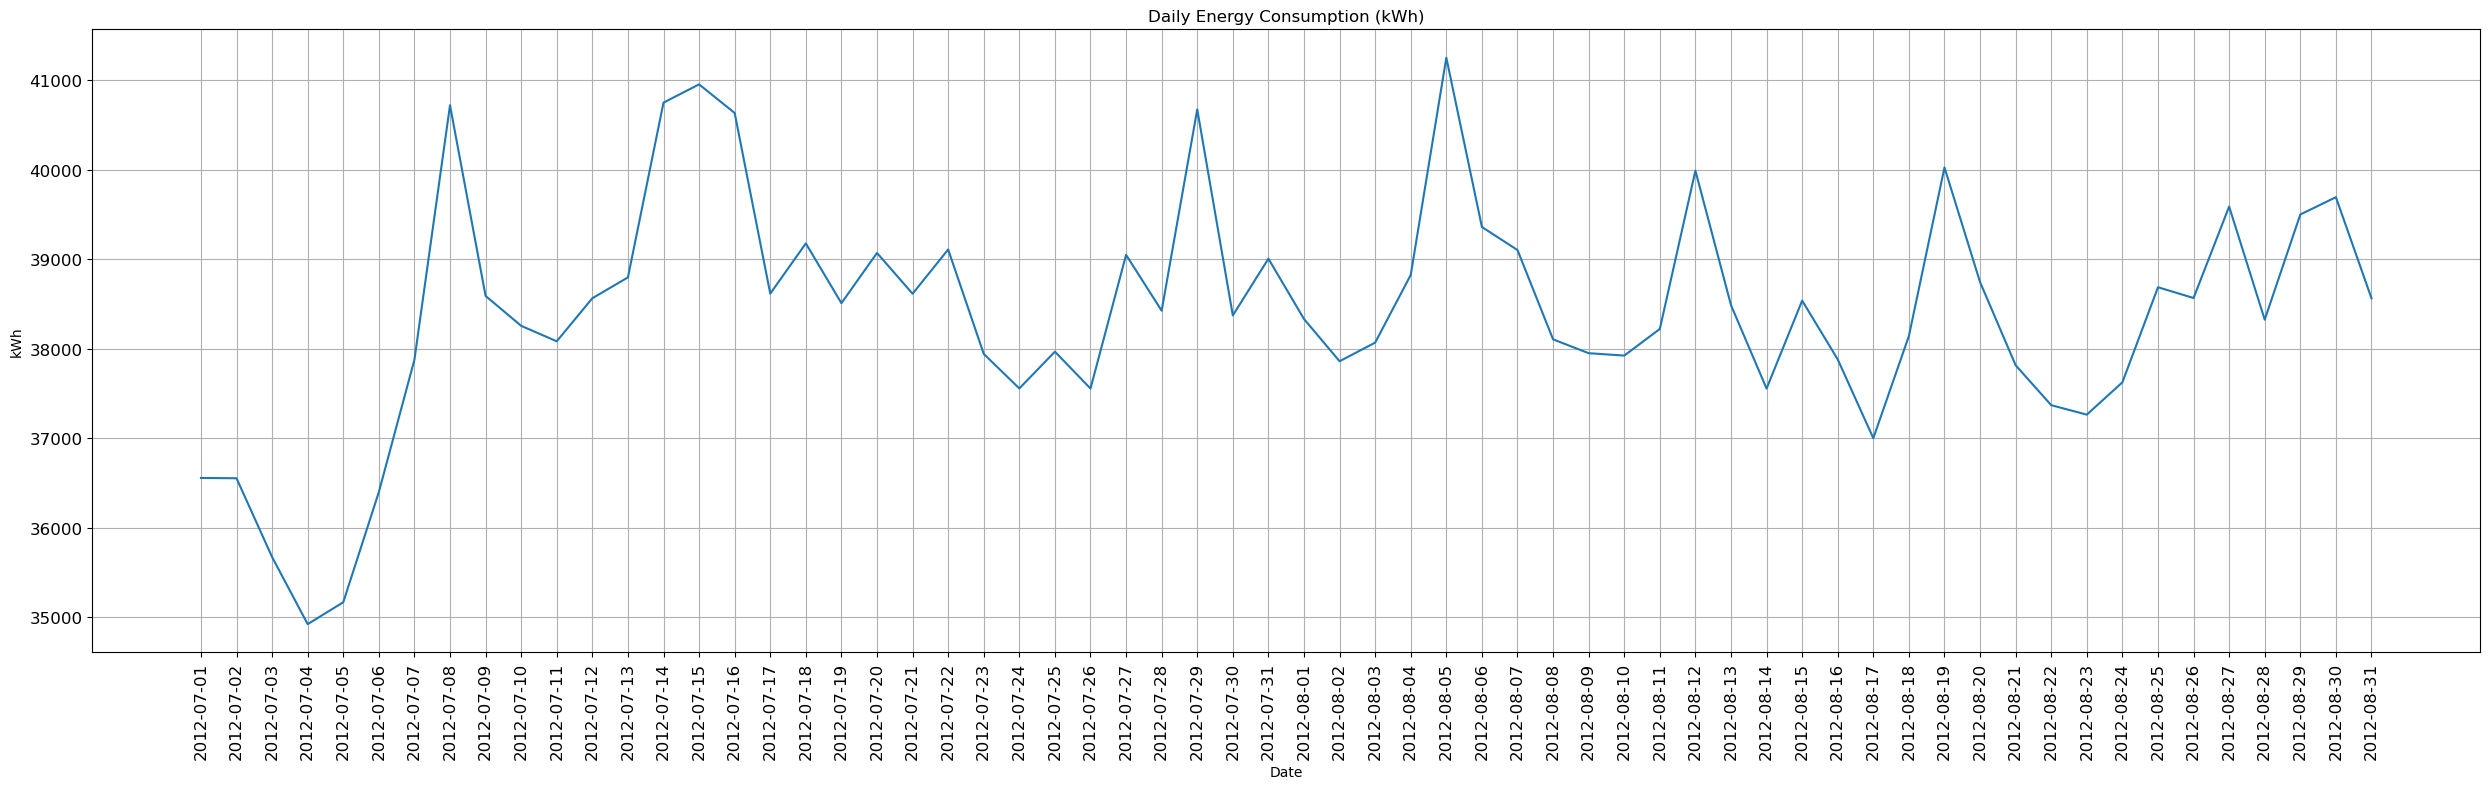

In [19]:
if LEVEL == "daily":
    plt.figure(figsize=(25,8))
elif LEVEL == "halfhourly":
    plt.figure(figsize=(400,15))
plt.plot(energy_2.day, energy_2.energy_sum)
if LEVEL == "daily":
    plt.title("Daily Energy Consumption (kWh)")
elif LEVEL == "halfhourly":
    plt.title("Halfhourly Energy Consumption (kWh)")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.grid(True)
plt.xticks(rotation=90)
if LEVEL == "daily":
    plt.savefig("engergy_daily.png")
elif LEVEL == "halfhourly":
    plt.savefig("engergy_halfhourly.png")
plt.show()

In [20]:
#from datetime import datetime

#exp_dates = ['2012-07-08','2012-07-15', '2012-07-29', '2012-08-05']

#exp_dates_2 = ['2012-07-01','2012-07-22','2012-08-12','2012-08-19', '2012-08-26']

#exp_dates_3 = ['2012-07-14','2012-07-16','2012-08-27','2012-08-29','2012-08-30']

#for d in exp_dates_3:
#    date = datetime.strptime(d, '%Y-%m-%d')
#    print(date.strftime('%A'))

## Block visualization

In [21]:
BLOCKS = 112

In [22]:
# visualize all 112 blocks

#for b in range(BLOCKS):
#    df = pd.read_csv(EXPDATA + "e_" + str(b) + ".csv")
#    energy = df.groupby(['day'])['energy_sum'].sum().reset_index() # daily data
#    energy.day=pd.to_datetime(energy.day,format='%Y-%m-%d') # daily data
#    
#    start_date = '2012-07-01'
#    end_date   = '2012-08-31'
#
#    after_start_date = energy["day"] >= start_date
#    before_end_date = energy["day"] <= end_date
#    between_two_dates = after_start_date & before_end_date
#
#    energy_2 = energy.loc[between_two_dates]
#    energy_2['day'] = energy_2['day'].astype(str)
        
#    plt.figure(figsize=(25,8))
#    plt.plot(energy_2.day, energy_2.energy_sum)
#    plt.title("Daily Energy Consumption (kWh)" + " - block:" + str(b))
#    plt.xlabel("Date")
#    plt.ylabel("kWh")
#    plt.grid(True)
#    plt.xticks(rotation=90)
#    plt.savefig("daily_fig/engergy_daily_block_" + str(b) + ".png")
#    plt.show()

In [23]:
#plt.figure(figsize=(25,25))
#plt.title("Daily Energy Consumption (kWh)" + ", all blocks:")
#plt.xlabel("Date")
#plt.ylabel("kWh")
#plt.grid(True)
#plt.xticks(rotation=90)
#    
#for b in range(BLOCKS):
#    df = pd.read_csv(EXPDATA + "e_" + str(b) + ".csv")
#    energy = df.groupby(['day'])['energy_sum'].sum().reset_index() # daily data
#    energy.day=pd.to_datetime(energy.day,format='%Y-%m-%d') # daily data
#    
#    start_date = '2012-07-01'
#    end_date   = '2012-08-31'
#
#    after_start_date = energy["day"] >= start_date
#    before_end_date = energy["day"] <= end_date
#    between_two_dates = after_start_date & before_end_date
#
#    energy_2 = energy.loc[between_two_dates]
#    energy_2['day'] = energy_2['day'].astype(str)
#    
#    
#    plt.plot(energy_2.day, energy_2.energy_sum)
#plt.savefig("engergy_daily_all_blocks.png")
#plt.show()

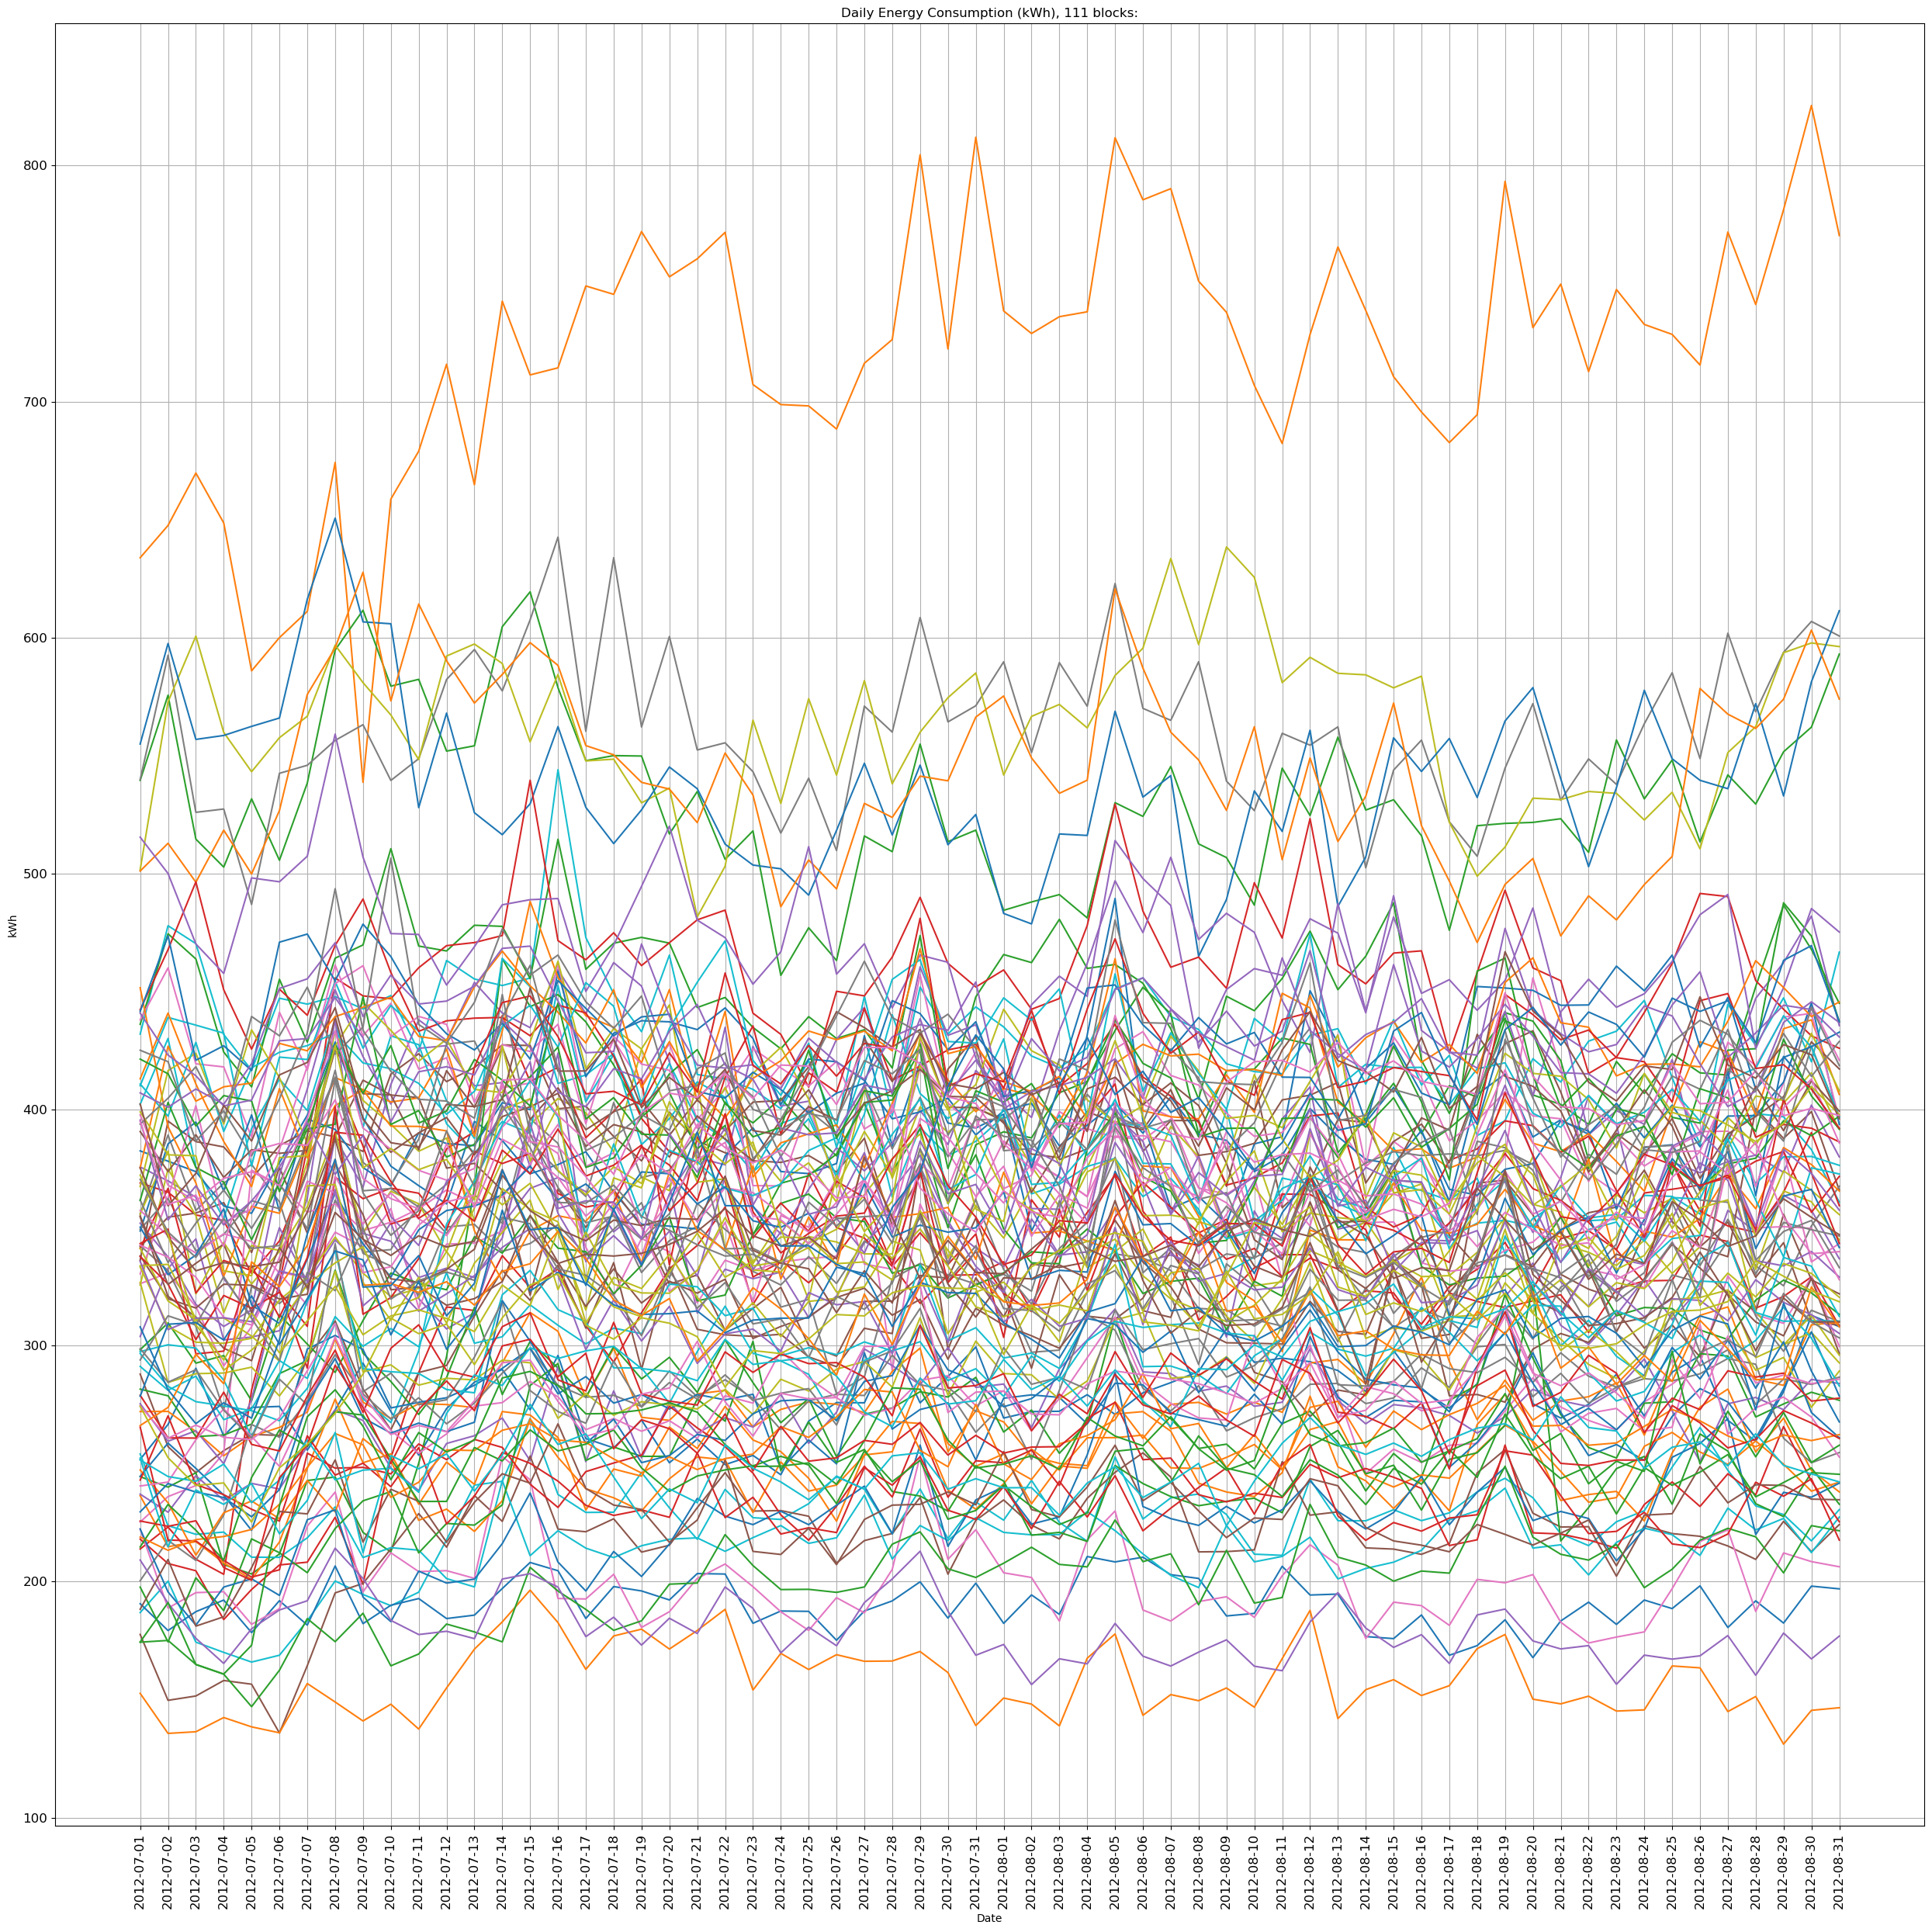

In [24]:
plt.figure(figsize=(25,25))
plt.title("Daily Energy Consumption (kWh)" + ", 111 blocks:")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.grid(True)
plt.xticks(rotation=90)
    
for b in range(BLOCKS-1):
    df = pd.read_csv(EXPDATA + "e_" + str(b) + ".csv")
    energy = df.groupby(['day'])['energy_sum'].sum().reset_index() # daily data
    energy.day=pd.to_datetime(energy.day,format='%Y-%m-%d') # daily data
    
    start_date = '2012-07-01'
    end_date   = '2012-08-31'

    after_start_date = energy["day"] >= start_date
    before_end_date = energy["day"] <= end_date
    between_two_dates = after_start_date & before_end_date

    energy_2 = energy.loc[between_two_dates]
    energy_2['day'] = energy_2['day'].astype(str)
    
    plt.plot(energy_2.day, energy_2.energy_sum)
    
plt.savefig("engergy_daily_111_blocks.png")
plt.show()

In [25]:
# this codes to display how many household per block
#plt.figure(figsize=(25,8))
#plt.title("Households in blocks")
#plt.xlabel("Blocks")
#plt.ylabel("# household")
#plt.grid(True)
#plt.xticks(rotation=90)
    
#households = []    
#    
#for b in range(BLOCKS):
#    df = pd.read_csv(EXPDATA + "e_" + str(b) + ".csv")
#    #print(df['LCLid'].nunique())
#    households.append(df['LCLid'].nunique())
#
#households = np.array(households)
#print(households)
#print(households.sum())
#plt.scatter(np.arange(0,len(households)), households)
#plt.savefig("household_in_all_blocks.png")
#plt.show()

### Clustering

In [26]:
import seaborn as sns

In [27]:
energy_sum_blocks = []

for b in range(BLOCKS-1):
    df = pd.read_csv(EXPDATA + "e_" + str(b) + ".csv")
    energy = df.groupby(['day'])['energy_sum'].sum().reset_index() # daily data
    energy.day=pd.to_datetime(energy.day,format='%Y-%m-%d') # daily data
    
    start_date = '2012-07-01'
    end_date   = '2012-08-31'

    after_start_date = energy["day"] >= start_date
    before_end_date = energy["day"] <= end_date
    between_two_dates = after_start_date & before_end_date

    energy_2 = energy.loc[between_two_dates]
    energy_sum_blocks.append(energy_2['energy_sum'].sum())
    #energy_2['day'] = energy_2['day'].astype(str)

energy_sum_blocks = pd.DataFrame(energy_sum_blocks)

In [28]:
#energy_sum_blocks

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage
l = ['complete','single','weighted','average','median','ward']

link_method = "ward"

D = s(energy_sum_blocks)

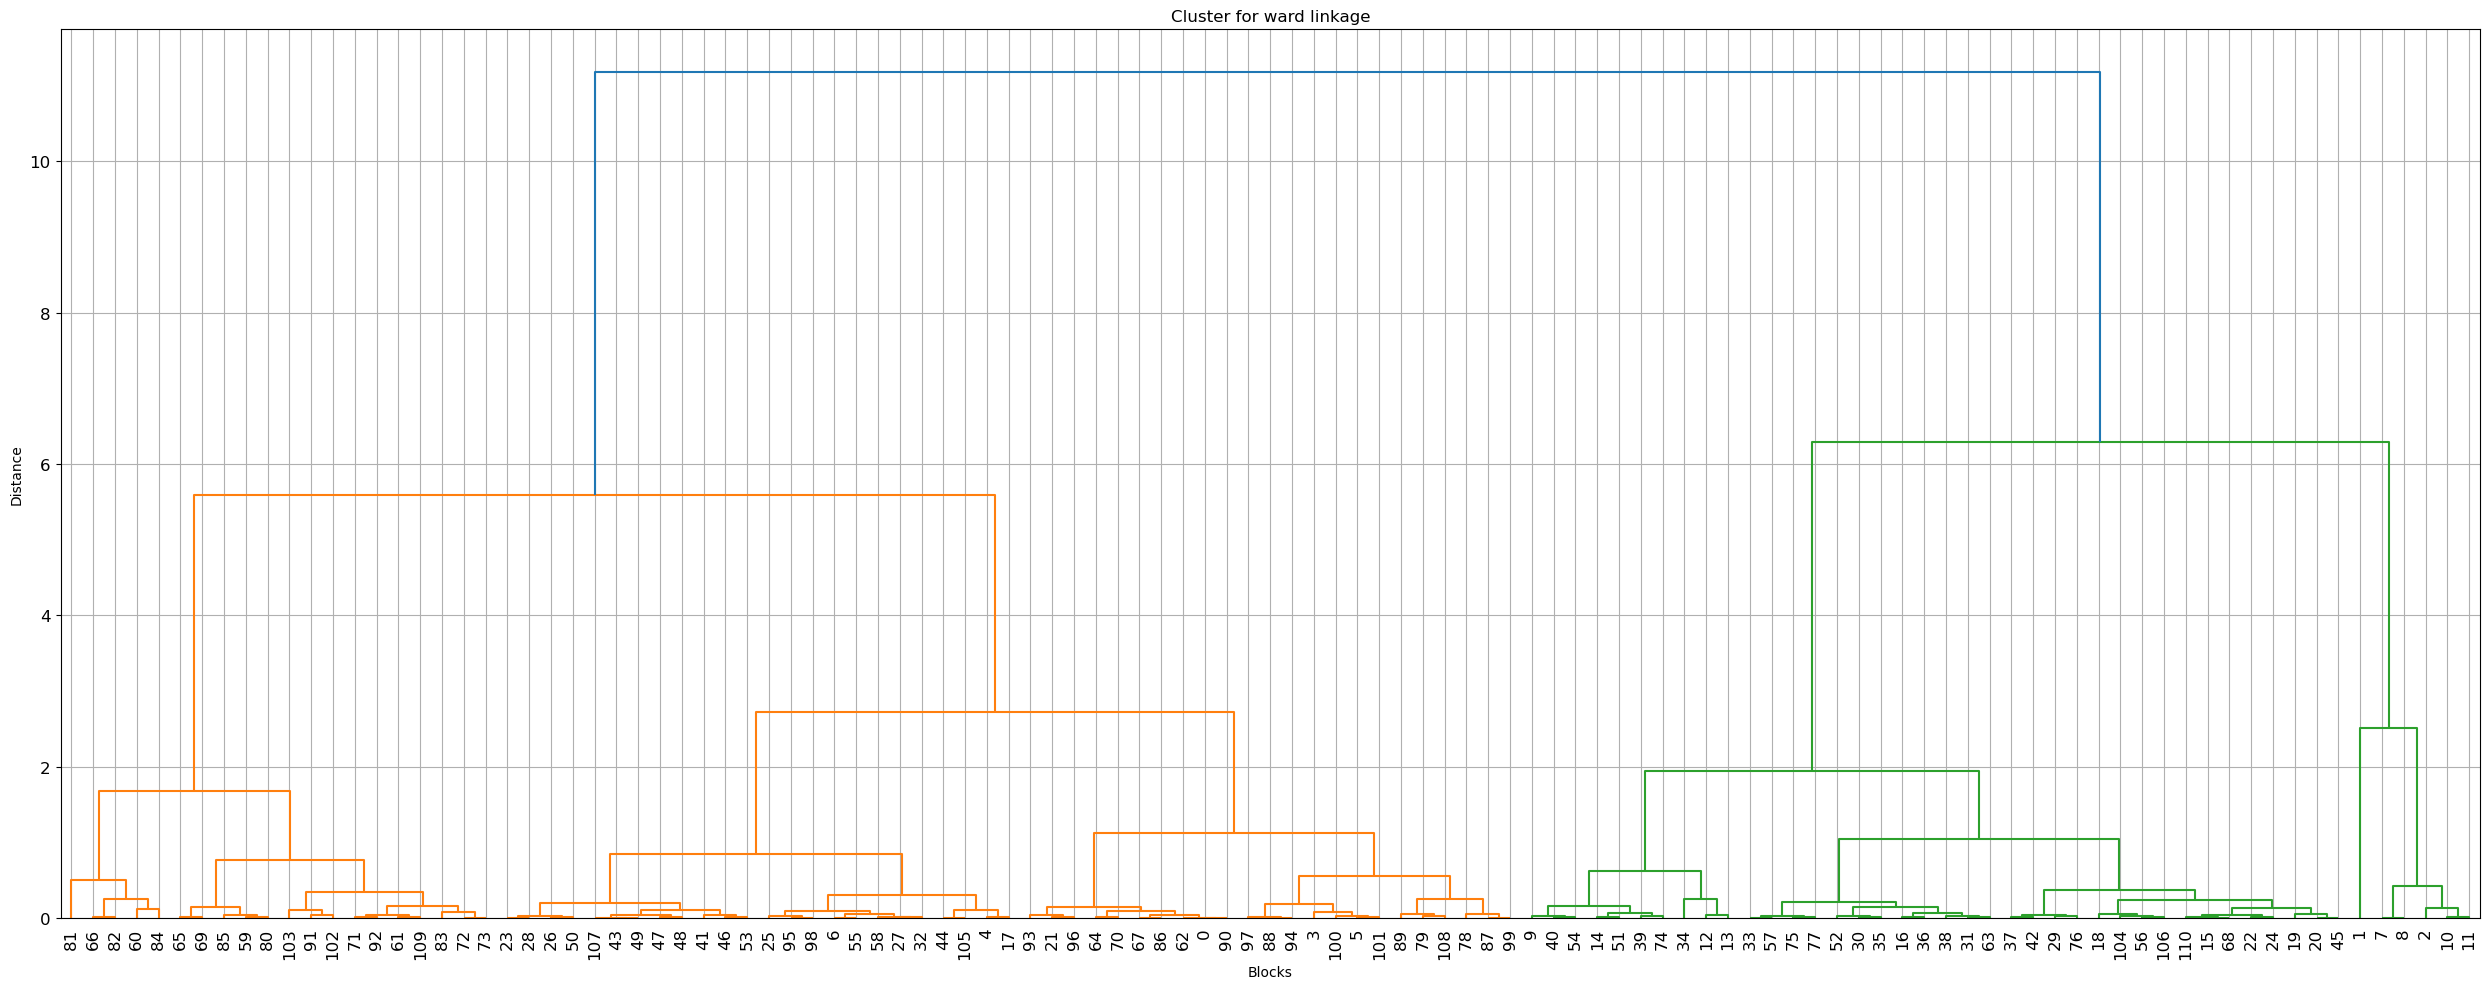

In [30]:
plt.figure(figsize=(25,10))
Z = sch.linkage(D,method=link_method)
den = sch.dendrogram(Z)
plt.title('Cluster for '+ link_method +' linkage')
plt.xlabel('Blocks')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(rotation=90, fontsize=12)
plt.savefig("clustering_engergy_daily_111_blocks.png")
plt.show()